# Font Generator
**Yusuf Fawzy Program**

# The Imports

In [5]:
import os
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from PIL import ImageFont,Image,ImageDraw
import numpy as np
import math
%matplotlib inline

#another method for computing how much they are "Structural Similarity Index"
from skimage.measure import structural_similarity as ssim,compare_ssim
#Unlike MSE, the SSIM value can vary between -1 and 1, where 1 indicates perfect similarity.
#SSIM, while slower, is able to perceive the change in
# structural information of the image by comparing local regions of the image instead of globally.

# Get Font and Pics Names

In [96]:
image_folders_names = ['abwab','adab el rafydan','afaq arabya','el adib','el doha','el helal','el mnar','el qesa']
image_names =[]
text_names=[]
for i,name in enumerate(image_folders_names):
    image_names.append([]); text_names.append([])
    for photo_name in os.listdir("C:/Users/Yusuf/Desktop/RDI Data/test_data/words_images_new/" +name):
        image_names[i].append(photo_name)
        text_names[i].append(photo_name[:-3]+'txt')
print(len(text_names))

8


In [139]:
#old folder of Images
path_images = 'C:/Users\Yusuf\Desktop\ToManipulate\Photo'
photo_names = os.listdir(path_images)
length = len(photo_names)
print(length)

60


In [95]:
n_book = 1 
n_sample = 55
print(image_names[n_book][n_sample])
print(text_names[n_book][n_sample])

Adab_AL_Rafidayn_Adab_AL_Rafidayn_book_adab_al_rafidayn_adab_al_rafidayn_1977_issue_8_386_Line15_w0.bmp
Adab_AL_Rafidayn_Adab_AL_Rafidayn_book_adab_al_rafidayn_adab_al_rafidayn_1977_issue_8_386_Line15_w0.txt


In [94]:
fonts = []
#get all the fonts I have here
for i in os.listdir('.'):
    if i.endswith('.ttf'):
        fonts.append(i)
print(fonts)
print(len(fonts))

['AL-Mohanad-Bold.ttf', 'andlso.ttf', 'arial.ttf', 'arialbd.ttf', 'calibri.ttf', 'calibrib.ttf', 'calibril.ttf', 'cour.ttf', 'courbd.ttf', 'Greta-Arabic-Bold-Italic.ttf', 'majalla.ttf', 'majallab.ttf', 'micross.ttf', 'segoeui.ttf', 'segoeuib.ttf', 'segoeuil.ttf', 'segoeuisl.ttf', 'seguisb.ttf', 'Sp_Badr-Bold_p30download.com_.ttf', 'Sp_Badr_p30download.com_.ttf', 'Sp_Compset-Bold_p30download.com_.ttf', 'Sp_Lotus-Bold_p30download.com_.ttf', 'Sp_Nazanin-Bold_p30download.com_.ttf', 'Sp_Yagut-Bold_p30download.com_.ttf', 'tahoma.ttf', 'tahomabd.ttf', 'times.ttf', 'timesbd.ttf', 'tradbdo.ttf', 'trado.ttf', 'XB-KayhanBd.ttf']
31


# Comparing

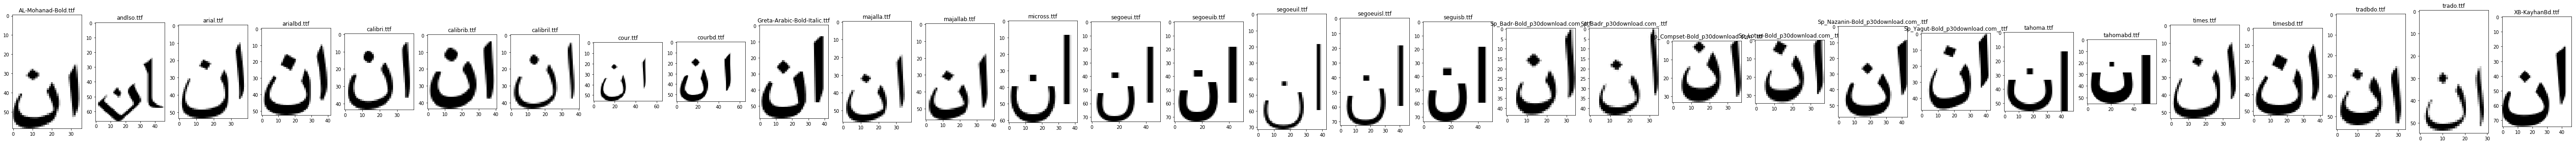

In [153]:
#Compare using SSIM
minn = math.exp(100)
matched_font = None
matched_img = None
orig = Image.open(path_images+'/'+photo_names[8])
plt.figure(figsize=(100,100))
for i,f in enumerate(fonts) :
    #know size of text image
    reshaped_text = arabic_reshaper.reshape('ان')
    bidi_text = get_display(reshaped_text)
    fnt = ImageFont.truetype(font = f,size=55)
    font_size = fnt.getsize(bidi_text)
    #make a blank image
    img = Image.new('L',(font_size[0],font_size[1]),(255) )
    #draw the text into the blank image
    d = ImageDraw.Draw(img)
    d.text((0,0),text=bidi_text, fill=(0),font=fnt)

    
    plt.subplot(1,len(fonts),i+1)
    plt.title(f)
    plt.imshow(img)
    #img.save('pil_text_font.png')
''' 
  c= c2d(img,orig,mode='same')
    if (compare_ssim(np.array(orig),np.array(img))<minn):
        minn = compare_ssim(np.array(orig),np.array(img))
        matched_font = (i,f)
        matched_img = img
'''
#Comparing two Images
#plt.imshow(img)

In [ ]:

draw = ImageDraw.Draw(img)
text_size = draw.textsize(text, fnt)

# resize and draw
img = img.resize(text_size)
draw.text((0,0), text, (0,0,0), fnt)
img.save('signature.png')
plt.imshow(draw)

In [127]:
#Compare using CrossCorrelation
maxi = -10000
matched_font = None
matched_img = None
orig = Image.open(path_images+'/'+photo_names[8])
#plt.figure(figsize=(100,100))
for i,f in enumerate(fonts) :
    img = Image.new('L', orig.size,(255) )
    reshaped_text = arabic_reshaper.reshape('ان')
    bidi_text = get_display(reshaped_text)
    
    fnt = ImageFont.truetype(font = f,size=55)
    d = ImageDraw.Draw(img)
    d.text((orig.size[1]-40,0),text='bidi_text', fill=(0),font=fnt)
    '''
    plt.subplot(1,len(fonts),i+1)
    plt.title(f)
    plt.imshow(img)'''
    #img.save('pil_text_font.png')
    c= c2d(img,orig,mode='same')
    # if (compare_ssim(np.array(orig),np.array(img))<minn):
    if (c.max()>maxi):
        maxi =c.max()
        matched_font = (i,f)
        matched_img = img

plt.subplot(1,2,1)
plt.imshow(orig)
plt.subplot(1,2,2)
plt.imshow(matched_img)
print(matched_font)
print(maxi)
#print(compare_ssim(np.array(matched_img),np.array(orig)))

TypeError: Can't convert 'list' object to str implicitly

# Cross Correlation and other Metrics

[ 80 199  26 ...,  50 153  63]
255


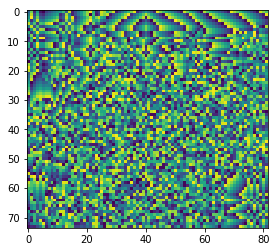

In [11]:
from scipy import signal 
from scipy.signal.signaltools import correlate2d as c2d
c= c2d(matched_img,orig,mode='same')
print(c.ravel())
print(c.max())
plt.imshow(c)

In [6]:
def Mean_SQUARED_ERROR(image1 ,image2):
    image1 = np.array(image1)
    image2 = np.array(image2)
    err = np.sum((image1.astype('float')-image2.astype('float'))**2)
    err/=float (image1.shape[0]*image1.shape[1])
    return err;

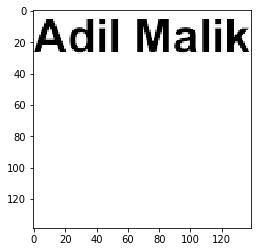

In [136]:
name = 'Adil Malik'
selected_font='simply_glomrous.ttf'
font_size=30

font = ImageFont.truetype(fonts[0], 30)
font_size = font.getsize(name)

img = Image.new('RGBA', (font_size[0], font_size[0]), (255, 255, 255, 0))
draw = ImageDraw.Draw(img)
font = ImageFont.truetype(fonts[0], 30)
draw.text((0,0), name, (0,0,0), font)
img.save('signature.png')
plt.imshow(img)